In [46]:
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
import sys
import numpy as np
from matplotlib.ticker import ScalarFormatter

%matplotlib inline

In [47]:
today_str = date.today().strftime("%d%B%Y")
datafile = 'sd_covid_dataset.csv'

In [48]:
df = pd.read_csv(datafile) 

## Total cases in San Diego

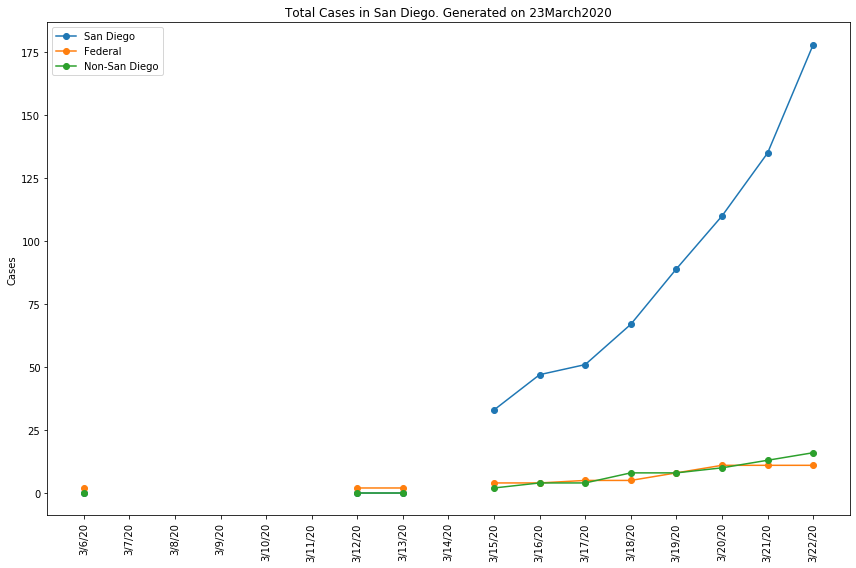

In [49]:
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date'], df['sd_total'], '-o', label="San Diego")
ax.plot(df['date'], df['fed_total'], '-o', label="Federal")
ax.plot(df['date'], df['nonsd_total'], '-o', label="Non-San Diego")
plt.ylabel("Cases")
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.title('Total Cases in San Diego. Generated on '+today_str)
plt.tight_layout()
plt.savefig("./plots/totalcasesinSanDiego_"+today_str+".png")

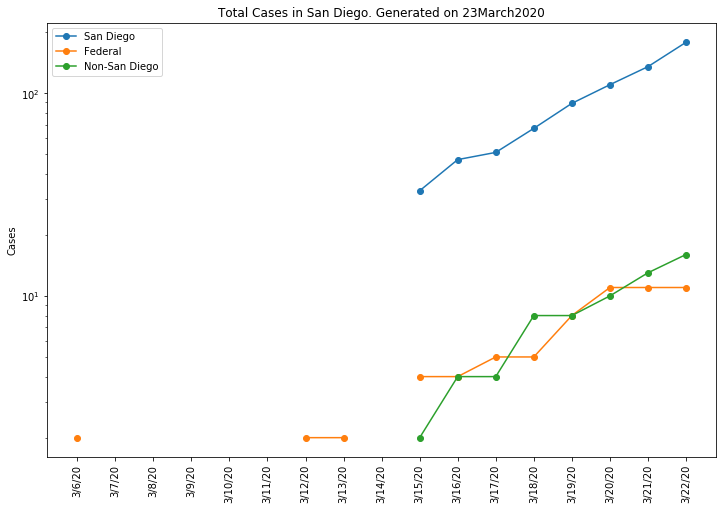

In [50]:
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date'], df['sd_total'], '-o', label="San Diego")
ax.plot(df['date'], df['fed_total'], '-o', label="Federal")
ax.plot(df['date'], df['nonsd_total'], '-o', label="Non-San Diego")
plt.ylabel("Cases")
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.title('Total Cases in San Diego. Generated on '+today_str)
plt.yscale('log')
plt.savefig("./plots/totalcasesinSanDiego_logscale_"+today_str+".png")

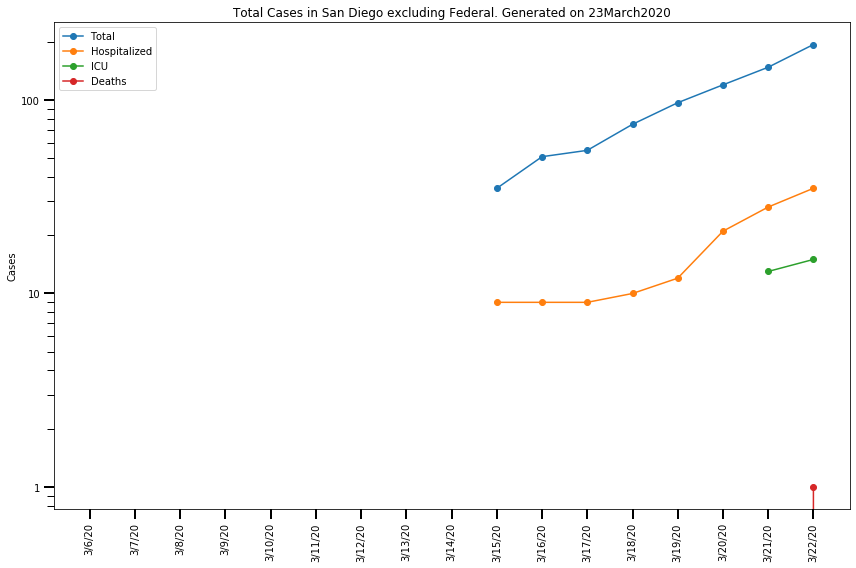

In [51]:
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date'], df['sd_total']+df['nonsd_total'], '-o', label="Total")
ax.plot(df['date'], df['sd_hosp']+df['nonsd_hosp'], '-o', label="Hospitalized")
ax.plot(df['date'], df['sd_icu']+df['nonsd_icu'], '-o', label="ICU")
ax.plot(df['date'], df['sd_death']+df['nonsd_death'], '-o', label="Deaths")

plt.ylabel("Cases")
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.yscale('log')
plt.title('Total Cases in San Diego excluding Federal. Generated on '+today_str)
plt.tick_params(direction='out', length=10, width=2)
plt.tick_params(direction='out', length=7, width=1, which='minor')
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.tight_layout()
plt.savefig("./plots/totalcasesinSanDiego_outcomedetail_logscale_nonfederal_"+today_str+".png")

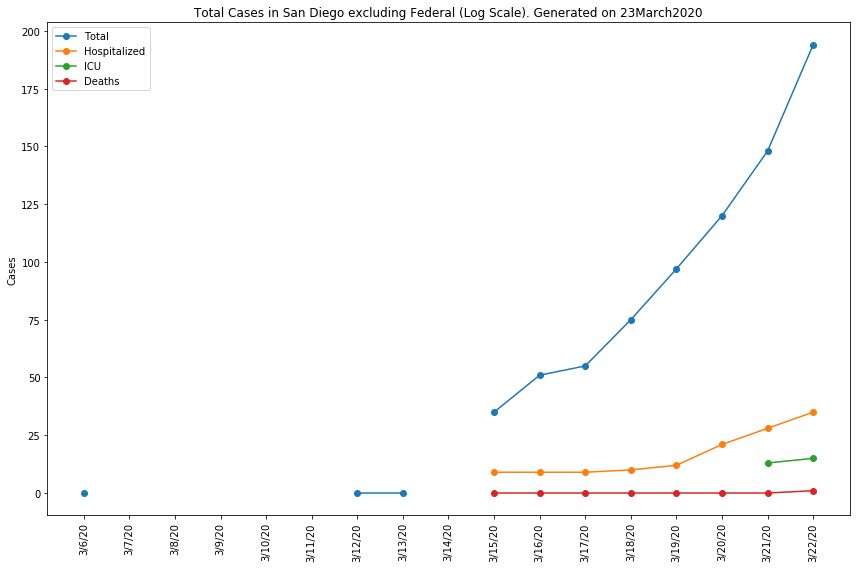

In [52]:
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date'], df['sd_total']+df['nonsd_total'], '-o', label="Total")
ax.plot(df['date'], df['sd_hosp']+df['nonsd_hosp'], '-o', label="Hospitalized")
ax.plot(df['date'], df['sd_icu']+df['nonsd_icu'], '-o', label="ICU")
ax.plot(df['date'], df['sd_death']+df['nonsd_death'], '-o', label="Deaths")

plt.ylabel("Cases")
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.title('Total Cases in San Diego excluding Federal (Log Scale). Generated on '+today_str)
plt.tight_layout()
plt.savefig("./plots/totalcasesinSanDiego_outcomedetail_nonfederal_"+today_str+".png")

## Breakdown by region

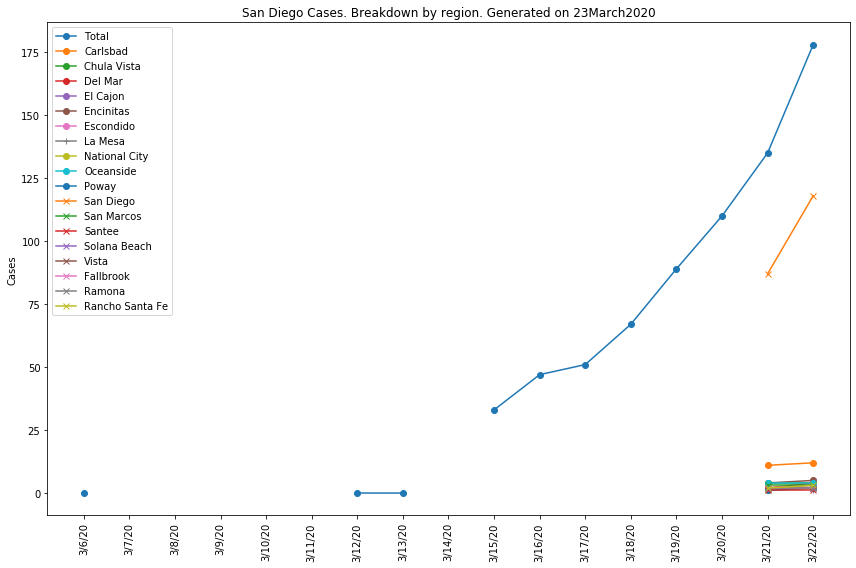

In [53]:
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date'], df['sd_total'], '-o', label="Total")
ax.plot(df['date'], df['carlsbad'], '-o', label="Carlsbad")
ax.plot(df['date'], df['chulavista'], '-o', label="Chula Vista")
ax.plot(df['date'], df['delmar'], '-o', label="Del Mar")
ax.plot(df['date'], df['elcajon'], '-o', label="El Cajon")
ax.plot(df['date'], df['encinitas'], '-o', label="Encinitas")
ax.plot(df['date'], df['escondido'], '-o', label="Escondido")
ax.plot(df['date'], df['lamesa'], '-+', label="La Mesa")
ax.plot(df['date'], df['nationalcity'], '-o', label="National City")
ax.plot(df['date'], df['oceanside'], '-o', label="Oceanside")
ax.plot(df['date'], df['poway'], '-o', label="Poway")
ax.plot(df['date'], df['sandiego'], '-x', label="San Diego")
ax.plot(df['date'], df['sanmarcos'], '-x', label="San Marcos")
ax.plot(df['date'], df['santee'], '-x', label="Santee")
ax.plot(df['date'], df['solanabeach'], '-x', label="Solana Beach")
ax.plot(df['date'], df['vista'], '-x', label="Vista")
ax.plot(df['date'], df['fallbrook'], '-x', label="Fallbrook")
ax.plot(df['date'], df['ramona'], '-x', label="Ramona")
ax.plot(df['date'], df['ranchosantafe'], '-x', label="Rancho Santa Fe")
plt.ylabel("Cases")
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.title('San Diego Cases. Breakdown by region. Generated on '+today_str)
plt.tight_layout()
plt.savefig("./plots/breakdownbyregion_"+today_str+".png")

## By Sex 

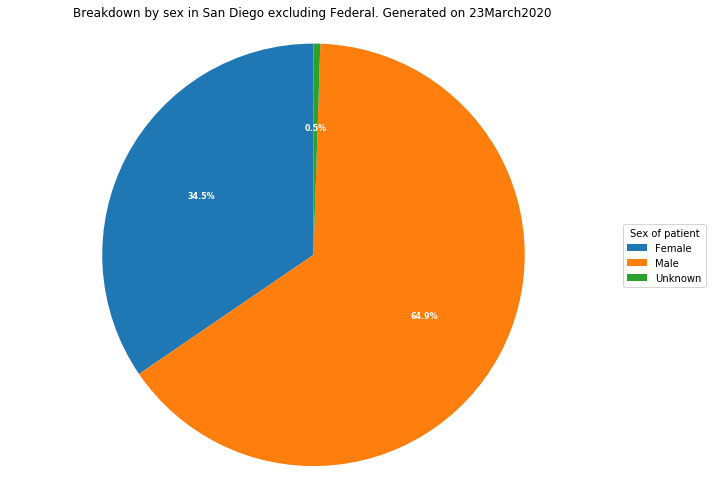

In [54]:
currentstate = df.tail(1)
labels = 'Female', 'Male', 'Unknown'

female=currentstate['sd_fem'].iloc[0]+currentstate['nonsd_fem'].iloc[0]
male=currentstate['sd_male'].iloc[0]+currentstate['nonsd_male'].iloc[0]
unk=currentstate['sd_sex_unk'].iloc[0]+currentstate['nonsd_sex_unk'].iloc[0]
sizes = [female, male, unk]

f, ax = plt.subplots(figsize=(10,7))
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=90, textprops=dict(color="w"))
ax.legend(wedges, labels, title="Sex of patient",
          loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.axis('equal')
plt.title('Breakdown by sex in San Diego excluding Federal. Generated on '+today_str)
plt.setp(autotexts, size=8, weight="bold")
plt.tight_layout()
plt.savefig("./plots/sexaffectedSanDiego_nonfederal_"+today_str+".png")

## By Age Group

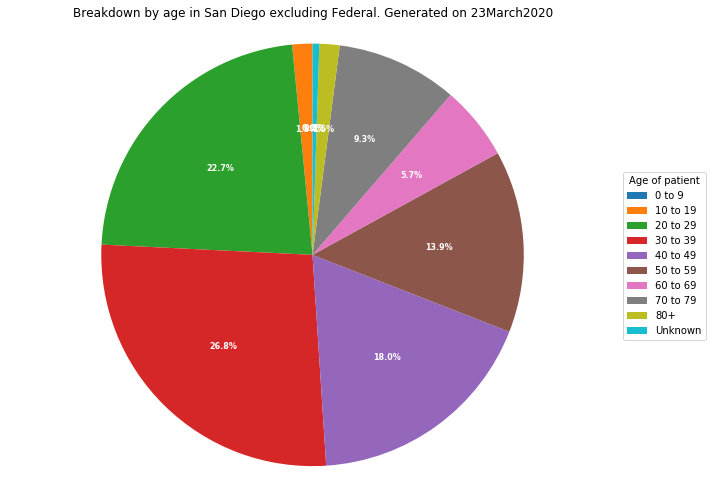

In [55]:
currentstate = df.tail(1)
labels = '0 to 9', '10 to 19', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69', '70 to 79', '80+', 'Unknown'

a0to9 = currentstate['sd_0to9'].iloc[0]+currentstate['nonsd_0to9'].iloc[0]
a10to19=currentstate['sd_10to19'].iloc[0]+currentstate['nonsd_10to19'].iloc[0]
a20to29=currentstate['sd_20to29'].iloc[0]+currentstate['nonsd_20to29'].iloc[0]
a30to39=currentstate['sd_30to39'].iloc[0]+currentstate['nonsd_30to39'].iloc[0]
a40to49=currentstate['sd_40to49'].iloc[0]+currentstate['nonsd_40to49'].iloc[0]
a50to59=currentstate['sd_50to59'].iloc[0]+currentstate['nonsd_50to59'].iloc[0]
a60to69=currentstate['sd_60to69'].iloc[0]+currentstate['nonsd_60to69'].iloc[0]
a70to79=currentstate['sd_70to79'].iloc[0]+currentstate['nonsd_70to79'].iloc[0]
a80plus=currentstate['sd_80plus'].iloc[0]+currentstate['nonsd_80plus'].iloc[0]
unk=currentstate['sd_age_unk'].iloc[0]+currentstate['nonsd_age_unk'].iloc[0]
sizes = [a0to9, a10to19, a20to29, a30to39, a40to49, a50to59, a60to69, a70to79, a80plus, unk]
f, ax = plt.subplots(figsize=(10,7))
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=90, textprops=dict(color="w"), )

ax.legend(wedges, labels, title="Age of patient",
          loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
          
ax.axis('equal')
plt.title('Breakdown by age in San Diego excluding Federal. Generated on '+today_str)
plt.tight_layout()
plt.savefig("./plots/ageaffectedSanDiego_nonfederal_"+today_str+".png")